# Importamos y combinamos los datos

In [1]:
import pandas as pd
import re
import string
import numpy as np
import sys
sys.path.append('../')
import funciones as fn
import codecs
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
import matplotlib.colors as mcolors

In [2]:
df = pd.read_excel("informe_lanzamiento.xlsx")
xenofobia = fn.limpieza_base(df)
del_cols=["Query_Name", "Url", "Page_Type", "Language", "Country_Code", "Continent", "Continent_Code", 
          "Country", "Added", "Assignment", "Avatar", "Category_Details", 
          "Checked", "Display_URLs", "Expanded_URLs", "Facebook_Author_ID", "Facebook_Comments",
          "Facebook_Likes", "Facebook_Role", "Facebook_Shares", "Facebook_Subtype",
          "Full_Text", "Full_Name", "Instagram_Comments", "Instagram_Followers", "Instagram_Following",
          "Instagram_Likes", "Instagram_Interactions_Count", "Instagram_Posts",
          "Last_Assignment_Date", "Latitude", "Location_Name", "Longitude", "Media_Filter",
          "Media_URLs", "Original_Url", "Priority", "Short_URLs", "Resource_Id", "Starred",
          "Status", "Subtype", "Thread_Created_Date", "Thread_Id",
          "Thread_URL", "Twitter_Author_ID", "Twitter_Channel_Role", "Twitter_Reply_to", "Twitter_Retweet_of", 
          "Updated", "Blog_Name", "Copyright", "Item_Review", "Page_Type_Name", "Linkedin_Comments", 
          "Linkedin_Engagement", "Linkedin_Impressions", "Linkedin_Likes", "Linkedin_Shares", "Linkedin_Sponsored", 
          "Linkedin_Video_Views", "Parent_Blog_Name", "Parent_Post_Id", "Pub_Type", "Publisher_Sub_Type", "Rating", 
          "Reddit_Score", "Region", "Region_Code", "Root_Blog_Name", "Root_Post_Id", "Weblog_Title", "Title", "Tags"]
#pruebas = codecs.open('Columnas_a_eliminar.txt','r',encoding='utf-8')
#more_cols = list()
#for line in pruebas.readlines():
#    more_cols.append(line.strip())
#del_cols = del_cols + more_cols
#print(del_cols)
xenofobia = xenofobia.drop(del_cols, axis=1)
for col in xenofobia.columns: 
    print(col)
xenofobia.head(11)

C:\Users\JOSE\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Escriba la fila donde se encuentran los nombres de las columnas - 5
            Bulk Mentions Download             Unnamed: 2  \
5                       Query Name                   Date   
6      [Q] Barómetro migrante Perú  2021-04-25 23:58:49.0   
7      [Q] Barómetro migrante Perú  2021-04-25 23:58:19.0   
8      [Q] Barómetro migrante Perú  2021-04-25 23:57:53.0   
9      [Q] Barómetro migrante Perú  2021-04-25 23:55:35.0   
...                            ...                    ...   
34960  [Q] Barómetro migrante Perú  2021-03-25 00:04:38.0   
34961  [Q] Barómetro migrante Perú  2021-03-25 00:01:26.0   
34962  [Q] Barómetro migrante Perú  2021-03-25 00:01:12.0   
34963  [Q] Barómetro migrante Perú  2021-03-25 00:00:46.0   
34964  [Q] Barómetro migrante Perú  2021-03-25 00:00:04.0   

                                              Unnamed: 3  \
5                                                  Title   
6      RT @avnve #Gobierno || Presidente @NicolasMadu...   
7      En qué cabez

,Date,Snippet,Domain,Sentiment,City_Code,Account_Type,Author,City,Gender,Hashtags,...,Ciudades_-_Lima,Ciudades_-_Trujillo,Medios_-_Arequipa,Medios_-_Callao,Medios_-_Chiclayo,Medios_-_Lima,Medios_-_Nacional,Medios_-_Trujillo,Medios_de_comunicación_-_Medios_de_comunicación_captura,Medios_de_comunicación_-_Medios_peruanos
0,2021-04-25 23:58:49.0,RT @avnve #Gobierno || Presidente @NicolasMadu...,twitter.com,neutral,PER.La Libertad.Trujillo,individual,Alicia19315,Trujillo,female,#gobierno,...,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-04-25 23:58:19.0,En qué cabeza le cabe a mi hermana que pedirle...,twitter.com,negative,PER.Lima Province.Lima,individual,laviejademajo,Lima,unknown,NaN,...,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-04-25 23:57:53.0,RT @aspauzarazuri Gonzales Posada es un vago q...,twitter.com,negative,PER.Lima Province.Lima,individual,MarielaOjedaCis,Lima,female,#fujiaprismonuncamas,...,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-04-25 23:55:35.0,@alexandraglez_ Ustedes son los mejores hagan ...,twitter.com,positive,PER.Lima Province.Lima,individual,ivonnepbr,Lima,female,NaN,...,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-04-25 23:54:04.0,...de las protestas de 2019 era muy atractivo ...,elperuano.pe,negative,NaN,NaN,NaN,NaN,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2021-04-25 23:54:00.0,RT @Simonovis Lo de Apure es mucho peor no hub...,twitter.com,negative,PER.Lima Province.Lima,individual,Fredypm,Lima,male,NaN,...,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2021-04-25 23:53:48.0,RT @polemicas1 Gobierno Genocida de EEUU prete...,twitter.com,negative,NaN,individual,cevebe8,NaN,female,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2021-04-25 23:52:33.0,RT @Eficiencia4F 🚨 ECUADOR | DOS ADOLESCENTE V...,twitter.com,neutral,PER.La Libertad.Trujillo,individual,anaisvel,Trujillo,unknown,"#cuidémonosdelacovid, #25abr",...,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2021-04-25 23:50:47.0,RT @MaestraZurda El bloqueo de EEUU a Venezuel...,twitter.com,neutral,NaN,individual,cevebe8,NaN,female,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2021-04-25 23:49:12.0,"RT @SoyRomy93 El criminal bloqueo económico, f...",twitter.com,neutral,NaN,individual,cevebe8,NaN,female,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
xenofobia['Clean_text']= xenofobia['Snippet'].replace(r'(.)\1+', r'\1\1', regex=True).str.strip()
xenofobia['Clean_text']= xenofobia['Clean_text'].replace('\s+', ' ', regex=True).str.strip()
xenofobia['Clean_text']= xenofobia['Clean_text'].replace(r"http\S+", '', regex=True)
xenofobia['Clean_text']= xenofobia['Clean_text'].astype(str)
xenofobia_WRT = xenofobia
xenofobia = xenofobia[~xenofobia['Clean_text'].str.startswith('RT')]
xenofobia

,Date,Snippet,Domain,Sentiment,City_Code,Account_Type,Author,City,Gender,Hashtags,...,Ciudades_-_Trujillo,Medios_-_Arequipa,Medios_-_Callao,Medios_-_Chiclayo,Medios_-_Lima,Medios_-_Nacional,Medios_-_Trujillo,Medios_de_comunicación_-_Medios_de_comunicación_captura,Medios_de_comunicación_-_Medios_peruanos,Clean_text
1,2021-04-25 23:58:19.0,En qué cabeza le cabe a mi hermana que pedirle...,twitter.com,negative,PER.Lima Province.Lima,individual,laviejademajo,Lima,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,En qué cabeza le cabe a mi hermana que pedirle...
3,2021-04-25 23:55:35.0,@alexandraglez_ Ustedes son los mejores hagan ...,twitter.com,positive,PER.Lima Province.Lima,individual,ivonnepbr,Lima,female,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,@alexandraglez_ Ustedes son los mejores hagan ...
4,2021-04-25 23:54:04.0,...de las protestas de 2019 era muy atractivo ...,elperuano.pe,negative,NaN,NaN,NaN,NaN,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..de las protestas de 2019 era muy atractivo p...
10,2021-04-25 23:48:56.0,"@E_FLEISCHMAN Vídeo fuera de lugar, sin base. ...",twitter.com,negative,NaN,individual,YordelDs,NaN,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"@E_FLEISCHMAN Vídeo fuera de lugar, sin base. ..."
12,2021-04-25 23:47:02.0,"@jeropim K está cómoda con que MVLL, Cateriano...",twitter.com,neutral,PER.Lima Province.Lima,individual,jc_silper,Lima,male,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"@jeropim K está cómoda con que MVLL, Cateriano..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34940,2021-03-25 00:26:38.0,"Chamo AMARÍA un domingo ahí comiendo cachapas,...",twitter.com,positive,PER.Lima Province.Lima,individual,Aleessandrob,Lima,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Chamo AMARÍA un domingo ahí comiendo cachapas,..."
34944,2021-03-25 00:18:57.0,Julio Guzmán lamenta que Hernando de Soto de 7...,twitter.com,negative,PER.Lima Province.Lima,individual,EncuestadoraCTM,Lima,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Julio Guzmán lamenta que Hernando de Soto de 7...
34946,2021-03-25 00:14:30.0,@ibepacheco Que la apliquen a la migración ven...,twitter.com,neutral,NaN,individual,ven_lima,NaN,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,@ibepacheco Que la apliquen a la migración ven...
34948,2021-03-25 00:12:57.0,@ibepacheco Las vacunas que se permitan aplica...,twitter.com,neutral,NaN,individual,ven_lima,NaN,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,@ibepacheco Las vacunas que se permitan aplica...


In [4]:
xenofobia['Date'] =  pd.to_datetime(xenofobia['Date'], infer_datetime_format=True)
xenofobia

<ipython-input-4-3055e7b6a3c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xenofobia['Date'] =  pd.to_datetime(xenofobia['Date'], infer_datetime_format=True)


,Date,Snippet,Domain,Sentiment,City_Code,Account_Type,Author,City,Gender,Hashtags,...,Ciudades_-_Trujillo,Medios_-_Arequipa,Medios_-_Callao,Medios_-_Chiclayo,Medios_-_Lima,Medios_-_Nacional,Medios_-_Trujillo,Medios_de_comunicación_-_Medios_de_comunicación_captura,Medios_de_comunicación_-_Medios_peruanos,Clean_text
1,2021-04-25 23:58:19,En qué cabeza le cabe a mi hermana que pedirle...,twitter.com,negative,PER.Lima Province.Lima,individual,laviejademajo,Lima,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,En qué cabeza le cabe a mi hermana que pedirle...
3,2021-04-25 23:55:35,@alexandraglez_ Ustedes son los mejores hagan ...,twitter.com,positive,PER.Lima Province.Lima,individual,ivonnepbr,Lima,female,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,@alexandraglez_ Ustedes son los mejores hagan ...
4,2021-04-25 23:54:04,...de las protestas de 2019 era muy atractivo ...,elperuano.pe,negative,NaN,NaN,NaN,NaN,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,..de las protestas de 2019 era muy atractivo p...
10,2021-04-25 23:48:56,"@E_FLEISCHMAN Vídeo fuera de lugar, sin base. ...",twitter.com,negative,NaN,individual,YordelDs,NaN,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"@E_FLEISCHMAN Vídeo fuera de lugar, sin base. ..."
12,2021-04-25 23:47:02,"@jeropim K está cómoda con que MVLL, Cateriano...",twitter.com,neutral,PER.Lima Province.Lima,individual,jc_silper,Lima,male,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"@jeropim K está cómoda con que MVLL, Cateriano..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34940,2021-03-25 00:26:38,"Chamo AMARÍA un domingo ahí comiendo cachapas,...",twitter.com,positive,PER.Lima Province.Lima,individual,Aleessandrob,Lima,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Chamo AMARÍA un domingo ahí comiendo cachapas,..."
34944,2021-03-25 00:18:57,Julio Guzmán lamenta que Hernando de Soto de 7...,twitter.com,negative,PER.Lima Province.Lima,individual,EncuestadoraCTM,Lima,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Julio Guzmán lamenta que Hernando de Soto de 7...
34946,2021-03-25 00:14:30,@ibepacheco Que la apliquen a la migración ven...,twitter.com,neutral,NaN,individual,ven_lima,NaN,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,@ibepacheco Que la apliquen a la migración ven...
34948,2021-03-25 00:12:57,@ibepacheco Las vacunas que se permitan aplica...,twitter.com,neutral,NaN,individual,ven_lima,NaN,unknown,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,@ibepacheco Las vacunas que se permitan aplica...


In [5]:
#xenofobia.to_excel("Base_limpia_informe_semana_sin_RT.xlsx") 
xenofobia_WRT.to_excel("Base_limpia_informe_semana_con_RT_Peru.xlsx") 

In [6]:
xenofobia_WRT = pd.read_excel("Base_limpia_informe_semana_con_RT_Peru.xlsx")

In [7]:
base = xenofobia_WRT[xenofobia_WRT['Gender'] != 'unknown']
base

,Unnamed: 0,Date,Snippet,Domain,Sentiment,City_Code,Account_Type,Author,City,Gender,...,Ciudades_-_Trujillo,Medios_-_Arequipa,Medios_-_Callao,Medios_-_Chiclayo,Medios_-_Lima,Medios_-_Nacional,Medios_-_Trujillo,Medios_de_comunicación_-_Medios_de_comunicación_captura,Medios_de_comunicación_-_Medios_peruanos,Clean_text
0,0,2021-04-25 23:58:49.0,RT @avnve #Gobierno || Presidente @NicolasMadu...,twitter.com,neutral,PER.La Libertad.Trujillo,individual,Alicia19315,Trujillo,female,...,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT @avnve #Gobierno || Presidente @NicolasMadu...
2,2,2021-04-25 23:57:53.0,RT @aspauzarazuri Gonzales Posada es un vago q...,twitter.com,negative,PER.Lima Province.Lima,individual,MarielaOjedaCis,Lima,female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT @aspauzarazuri Gonzales Posada es un vago q...
3,3,2021-04-25 23:55:35.0,@alexandraglez_ Ustedes son los mejores hagan ...,twitter.com,positive,PER.Lima Province.Lima,individual,ivonnepbr,Lima,female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,@alexandraglez_ Ustedes son los mejores hagan ...
5,5,2021-04-25 23:54:00.0,RT @Simonovis Lo de Apure es mucho peor no hub...,twitter.com,negative,PER.Lima Province.Lima,individual,Fredypm,Lima,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT @Simonovis Lo de Apure es mucho peor no hub...
6,6,2021-04-25 23:53:48.0,RT @polemicas1 Gobierno Genocida de EEUU prete...,twitter.com,negative,NaN,individual,cevebe8,NaN,female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT @polemicas1 Gobierno Genocida de EEUU prete...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34932,34932,2021-03-25 00:43:51.0,@CadrianzenGB @CUrquizoU @Jlincio Lo mejor que...,twitter.com,negative,PER.Lima Province.Lima,individual,DanielVC1992,Lima,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,@CadrianzenGB @CUrquizoU @Jlincio Lo mejor que...
34934,34934,2021-03-25 00:42:50.0,@CadrianzenGB @CUrquizoU @Jlincio No sé por qu...,twitter.com,negative,PER.Lima Province.Lima,individual,DanielVC1992,Lima,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,@CadrianzenGB @CUrquizoU @Jlincio No sé por qu...
34935,34935,2021-03-25 00:42:39.0,"BUEN VIDEO,VEANLO,AMIGAS,AMIGOS Ascendidos pos...",twitter.com,neutral,PER.Lima Province.Lima,individual,ezcurrarondonlm,Lima,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"BUEN VIDEO,VEANLO,AMIGAS,AMIGOS Ascendidos pos..."
34936,34936,2021-03-25 00:42:21.0,RT @SputnikMundo Te contamos todo lo que neces...,twitter.com,neutral,PER.Lima Province.Lima,individual,zoditorelax,Lima,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RT @SputnikMundo Te contamos todo lo que neces...


In [9]:
marcaciones = list()
marcaciones.extend(("Categorías_barómetro_-_Uso_Politico", "Categorías_barómetro_-_Educación", 
                    "Categorías_barómetro_-_Integración", "Categorías_barómetro_-_Salud", "Categorías_barómetro_-_Seguridad", 
                    "Categorías_barómetro_-_Trabajo", "Categorías_barómetro_-_Xenofobia"))
for marcacion in marcaciones:
    msg = base.apply(lambda x : True if x[marcacion] == "X" else False, axis = 1)
    num_rows = len(msg[msg == True].index)
    print("El número de mensajes marcados como " + marcacion + " en la base es : ", num_rows )

El número de mensajes marcados como Categorías_barómetro_-_Uso_Politico en la base es :  5704
El número de mensajes marcados como Categorías_barómetro_-_Educación en la base es :  296
El número de mensajes marcados como Categorías_barómetro_-_Integración en la base es :  1706
El número de mensajes marcados como Categorías_barómetro_-_Salud en la base es :  1848
El número de mensajes marcados como Categorías_barómetro_-_Seguridad en la base es :  2675
El número de mensajes marcados como Categorías_barómetro_-_Trabajo en la base es :  857
El número de mensajes marcados como Categorías_barómetro_-_Xenofobia en la base es :  2931


In [10]:
msg = base.apply(lambda x: True if x['Gender'] == 'male' else False, axis = 1)
male = round(len(msg[msg == True].index)/len(msg.index),2)
female = round(len(msg[msg == False].index)/len(msg.index),2)
print("El % de mensajes escritos por hombres es " + str(male) + " y el % escrito por mujeres es " + str(female))

El % de mensajes escritos por hombres es 0.74 y el % escrito por mujeres es 0.26


In [11]:
data = {'Sexo':  ['Hombre', 'Mujer'],
        'General': [male, female]}
tabla = pd.DataFrame(data, columns  = ['Sexo','General','Educación', 'Integración', 'Salud', 'Seguridad', 'Trabajo', 'Político', 'Xenofobia'])
tabla

,Sexo,General,Educación,Integración,Salud,Seguridad,Trabajo,Político,Xenofobia
0,Hombre,0.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mujer,0.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#Populate o llenar tabla
colnombres =  ['Político', 'Educación', 'Integración', 'Salud', 'Seguridad', 'Trabajo', 'Xenofobia']
i = 0
for marcacion in marcaciones:
    cent = base[base[marcacion] == 'X']
    msg = cent.apply(lambda x: True if x['Gender'] == 'male' else False, axis = 1)
    male = round(len(msg[msg == True].index)/len(msg.index),2)
    female = round(len(msg[msg == False].index)/len(msg.index),2)
    tabla[colnombres[i]][0] = male
    tabla[colnombres[i]][1] = female
    i+=1
tabla

<ipython-input-12-dbfc2b020eaa>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla[colnombres[i]][0] = male
<ipython-input-12-dbfc2b020eaa>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla[colnombres[i]][1] = female
<ipython-input-12-dbfc2b020eaa>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla[colnombres[i]][0] = male
<ipython-input-12-dbfc2b020eaa>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy o

,Sexo,General,Educación,Integración,Salud,Seguridad,Trabajo,Político,Xenofobia
0,Hombre,0.74,0.74,0.75,0.68,0.75,0.75,0.74,0.78
1,Mujer,0.26,0.26,0.25,0.32,0.25,0.25,0.26,0.22


In [13]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(),3)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

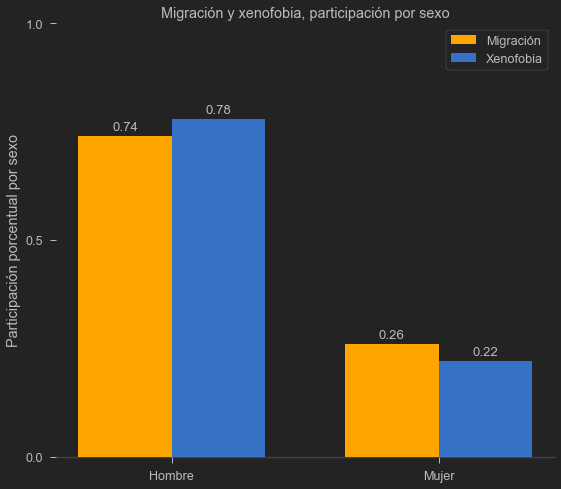

In [14]:
fig, ax = plt.subplots()
x = np.arange(len(tabla['Sexo']))  # the label locationss
width = 0.35  # the width of the bars
bar1 = ax.bar(x - width/2, tabla['General'], color = 'orange', width=width, label = 'Migración')
bar2 = ax.bar(x + width/2, tabla['Xenofobia'], color = mcolors.CSS4_COLORS.get('darkgoldenroot'), width=width, label = 'Xenofobia')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Participación porcentual por sexo')
yticks = pd.Series([0,0.5,1])
ax.set_yticks(yticks)
ax.set_title('Migración y xenofobia, participación por sexo')
ax.set_xticks(x)
ax.set_xticklabels(tabla['Sexo'])
autolabel(bar1)
autolabel(bar2)
ax.legend()
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_alpha(0.3)

fig.tight_layout()
plt.show()

Done Político
Done Educación
Done Integración
Done Salud
Done Seguridad
Done Trabajo
Done Xenofobia


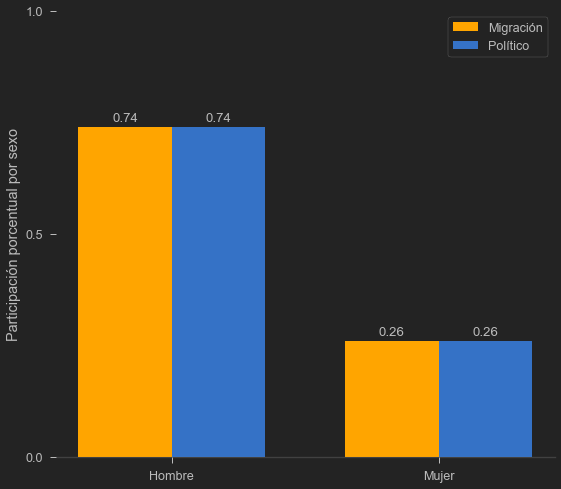

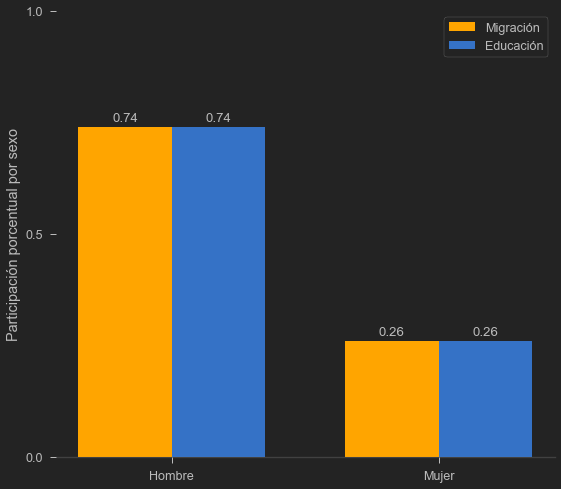

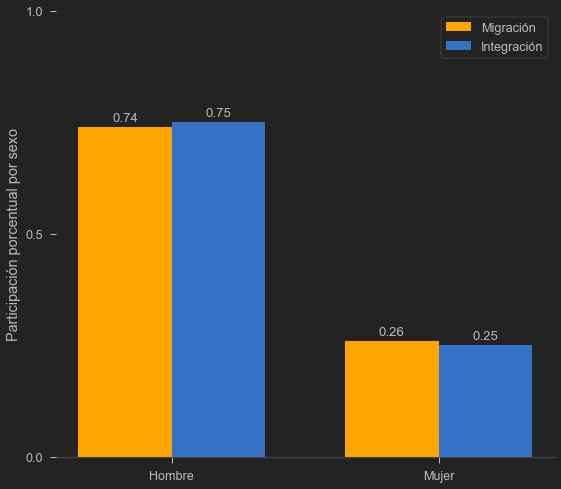

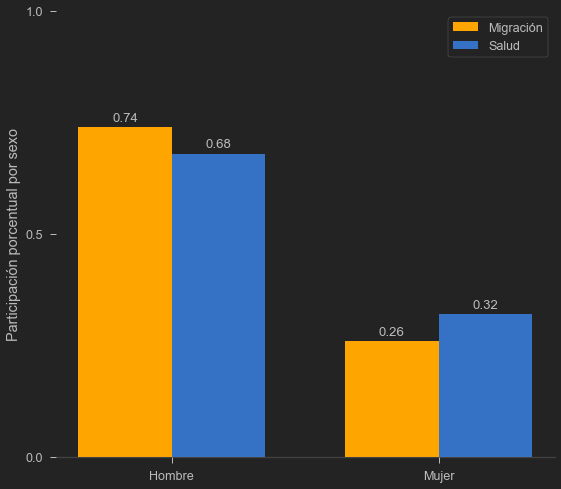

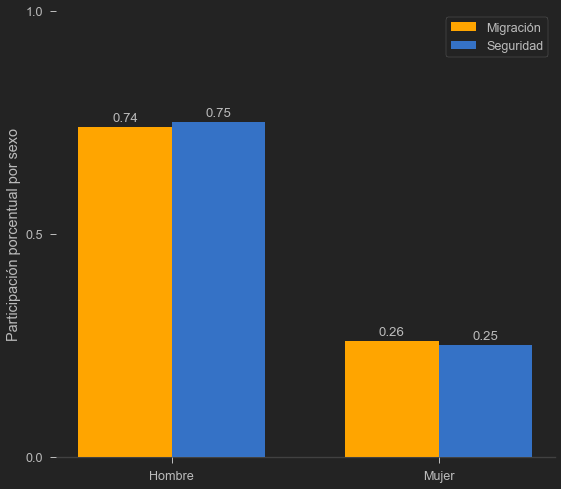

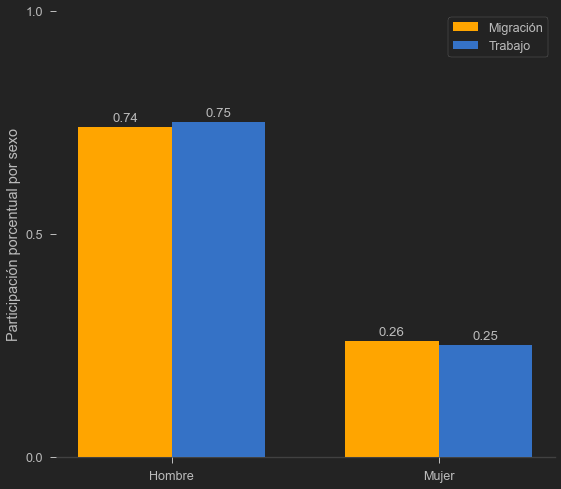

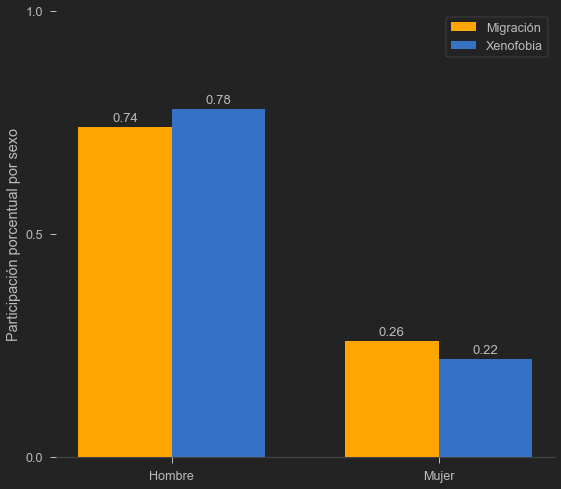

In [15]:
categorias =  ['Político', 'Educación', 'Integración', 'Salud', 'Seguridad', 'Trabajo', 'Xenofobia']
for categoria in categorias:
    fig, ax = plt.subplots()
    x = np.arange(len(tabla['Sexo']))  # the label locationss
    width = 0.35  # the width of the bars
    bar1 = ax.bar(x - width/2, tabla['General'], color = 'orange', width=width, label = 'Migración')
    bar2 = ax.bar(x + width/2, tabla[categoria], color = mcolors.CSS4_COLORS.get('darkgoldenroot'), width=width, label = categoria)
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Participación porcentual por sexo')
    yticks = pd.Series([0,0.5,1])
    ax.set_yticks(yticks)
    #ax.set_title('Migración y ' + categoria + ', participación por sexo')
    ax.set_xticks(x)
    ax.set_xticklabels(tabla['Sexo'])
    autolabel(bar1)
    autolabel(bar2)
    ax.legend()
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['bottom'].set_alpha(0.3)

    fig.tight_layout()
    plt.savefig( categoria + 'Pe.png',dpi=400)
    print('Done ' + categoria)

In [16]:
tabla.to_excel("Tabla_sexos_Pe.xlsx")